D:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


40 80 0 44
40 80 0 44


D:\anaconda\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
D:\anaconda\Lib\site-packages\xarray\core\indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


39 79 0 43


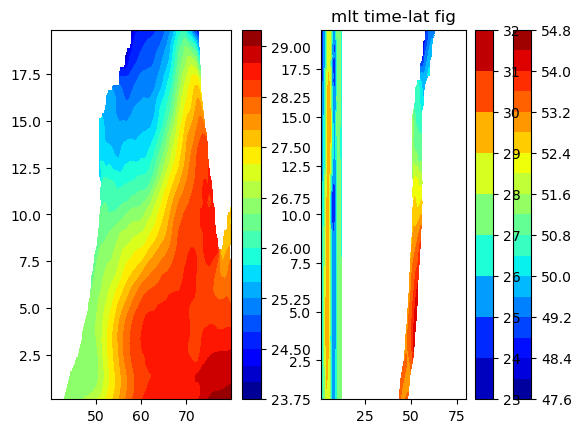

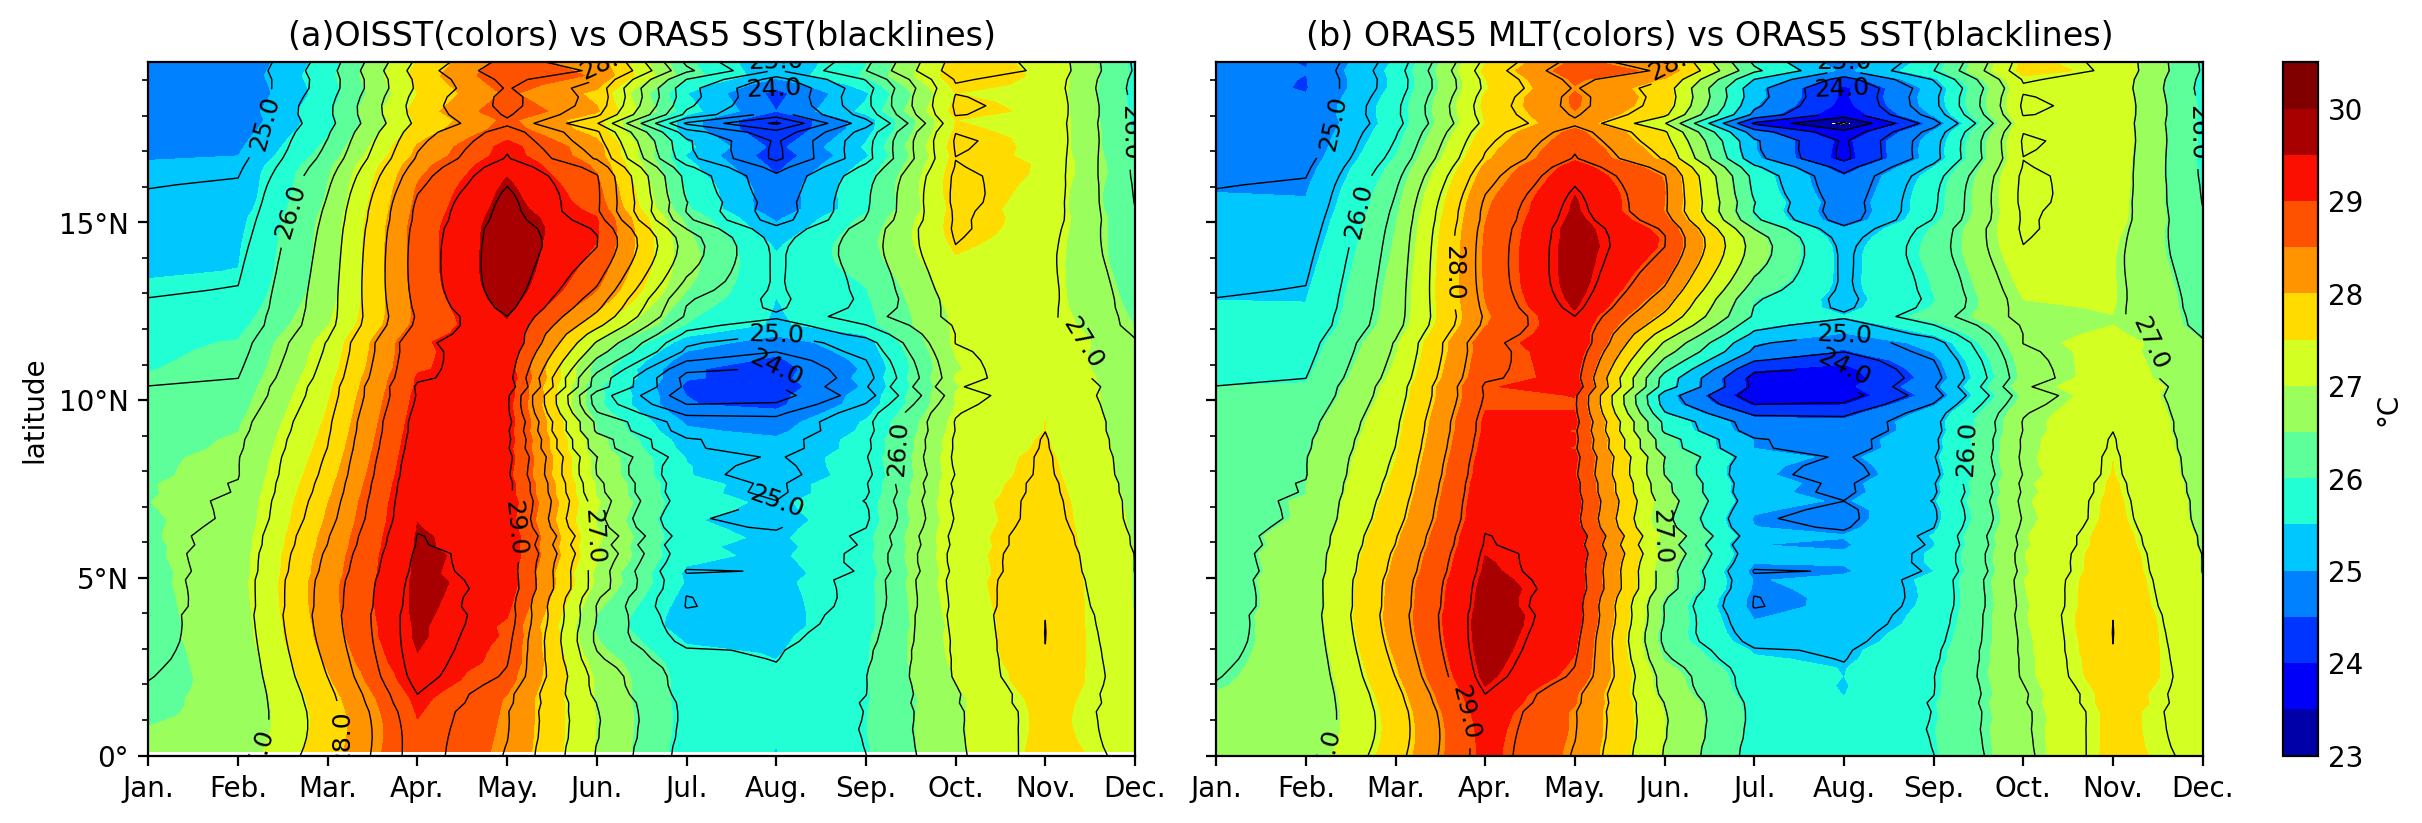

In [1]:
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d
import pandas as pd
import function
import matplotlib.pyplot as plt
from scipy.integrate import quad
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
file='E:\\data\\oras5\\somali-oras5\\no_cycle_MLD_every_term_climate.nc';ds0 = xr.open_dataset(file)
ds = ds0['mlt'].sel(latitude=slice(0,20),longitude=slice(35,65))
ds=ds+function.make_mask3D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]),ds)
oras_mlt=function.weight_lon(ds,ds,'mlt','jet')

file="E:\data\oras5\somali-oras5\oras5_100m_40-65E_ot&rho&u&v_climate.nc";ds0 = xr.open_dataset(file);ds= ds0.ptemp[:,0,:,:]
ds = ds.sel(latitude=slice(0,20),longitude=slice(35,65))
ds=ds+function.make_mask3D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]),ds);
oras_sst=function.weight_lon(ds,ds,'mlt','jet')

file='E:\\data\\oisst\\sst_mon_ltm_1991-2020.nc';ds=xr.open_dataset(file);#ds= list(ds.data_vars.values())[0]
ds=ds.sst.rename({'lat': 'latitude','lon': 'longitude'}).sel(latitude=slice(0,20),longitude=slice(40,80))
ds=ds.groupby('time.month').mean('time').rename({'month': 'time'})
ds=ds+function.make_mask3D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]),ds);
oisst=function.weight_lon(ds,ds,'mlt','jet')

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4),sharey=True, dpi=200,#sharex=True, 
                        constrained_layout=True)
axs[0].set_title('(a)OISST(colors) vs ORAS5 SST(blacklines)')
#axs[0].set_xlabel('month')
axs[0].set_ylabel('latitude')
cf=axs[0].contourf(oisst.time,oisst.latitude,oisst.T,cmap='jet', vmin=23, vmax=30,levels=np.arange(23, 31,0.5))
contours =axs[0].contour(oras_sst.time,oras_sst.latitude,oras_sst.T,colors='k',levels=np.arange(23, 31.5, 1),linewidths=0.5,linestyles='-')
axs[0].contour(oras_sst.time,oras_sst.latitude,oras_sst.T,colors='k',levels=np.arange(23.5, 31.5, 1),linewidths=0.5,linestyles='-')
#plt.xticks(contours,sst.time, ('1','2','3','4','5','6','7','8','9','10','11','12'))
axs[0].clabel(contours, inline=True, fontsize=9, fmt='%1.1f') 
axs[0].set_ylim([0,19.5])

axs[1].set_title('(b) ORAS5 MLT(colors) vs ORAS5 SST(blacklines)')
#axs[1].set_xlabel('month')
#axs[1].set_ylabel('latitude')
cf=axs[1].contourf(oras_mlt.time,oras_mlt.latitude,oras_mlt.T,cmap='jet', vmin=23, vmax=30,levels=np.arange(23, 31,0.5))
cb=fig.colorbar(cf,orientation='vertical',label='°C')
cb.ax.tick_params(length=0)
contours =axs[1].contour(oras_sst.time,oras_sst.latitude,oras_sst.T,colors='k',levels=np.arange(23, 31.5, 1),linewidths=0.5,linestyles='-')
axs[1].contour(oras_sst.time,oras_sst.latitude,oras_sst.T,colors='k',levels=np.arange(23.5, 31.5, 1),linewidths=0.5,linestyles='-')
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12]);axs[1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12]);
axs[0].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],)
axs[1].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],)
axs[1].clabel(contours, inline=True, fontsize=9, fmt='%1.1f') 
axs[0].yaxis.set_major_formatter(LatitudeFormatter())#axs[1].set_ylim([0.5,19.5])
axs[0].minorticks_on()# 启用次刻度
axs[0].set_yticks(np.arange(0, 20, 1), minor=True)  # # 设置次刻度的位置
axs[0].xaxis.set_minor_formatter(plt.NullFormatter());axs[0].xaxis.set_minor_locator(plt.NullLocator())#
axs[0].set_yticks([0,5,10,15]);